In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
#Primero veo que datos tengo respecto de estos centros
#Los datos fueron sacados de https://drive.google.com/file/d/0Bx63od1LTzcVelZhd2Q1OW1JLUE/view
centros_de_educacion =  pd.read_csv("dataFiltrada/establecimientos-educativos.csv")

data = centros_de_educacion[['lat','long','barrio','nivel']]

In [2]:
#Nos quedamos con jardines, primarios, secundarios y universidades
jardines = data[data['nivel'].str.contains("Inicial")]
primarios = data[data['nivel'].str.contains("Prima")]
secundarios = data[data['nivel'].str.contains("Secund")]
universidades = data[data['nivel'].str.contains("Univ")]

escuelas = pd.concat([jardines,primarios,secundarios,universidades])
escuelas.drop_duplicates(inplace = True)

In [3]:
#Renombro un campo
escuelas['lon'] = escuelas['long']
escuelas = escuelas[['lat','lon','barrio','nivel']]
escuelas.head()

,lat,lon,barrio,nivel
2,-34.565676,-58.470192,BELGRANO,Inicial Común
3,-34.584847,-58.400357,RECOLETA,Inicial Común
4,-34.603379,-58.426547,ALMAGRO,Inicial Común
5,-34.620816,-58.467954,FLORES,Inicial Común
6,-34.616163,-58.479206,VILLA SANTA RITA,Inicial Común


In [4]:

#Datos procesados
filteredData = pd.read_csv('dataFiltrada/dataV3.csv',low_memory = False)


#Tomo los datos que me interesan: estado, barrio, superficie, precio por m2, latitud y longitud)
propiedades = filteredData[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro','min_dist_subte']]


#Elimino NAs
propiedades.dropna(inplace=True)

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [13]:
propiedades = filteredData[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro','min_dist_subte']]
#Elimino NAs
propiedades.dropna(inplace=True)
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53395 entries, 0 to 53394
Data columns (total 17 columns):
start_date         53395 non-null object
end_date           53395 non-null object
lat                53395 non-null float64
lon                53395 non-null float64
barrio             53395 non-null object
rooms              53395 non-null float64
bedrooms           53395 non-null float64
bathrooms          53395 non-null float64
surface_total      53395 non-null float64
surface_covered    53395 non-null float64
price              53395 non-null float64
title              53395 non-null object
description        53395 non-null object
property_type      53395 non-null object
operation_type     53395 non-null object
dist_centro        53395 non-null float64
min_dist_subte     53395 non-null float64
dtypes: float64(10), object(7)
memory usage: 7.3+ MB


/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
#Defino una funcion que calcula la distancia entre dos puntos
import math
def dist(lat1,lon1,lat2,lon2):
    dLat = math.radians(lat2-lat1)
    dLon = math.radians(lon2-lon1)

    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)

    a = math.sin(dLat/2) * math.sin(dLat/2) + math.sin(dLon/2) * math.sin(dLon/2) * math.cos(lat1) * math.cos(lat2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return c * 6371 * 1000
    #return np.abs((lat1 - lat2) + (lon1 - lon2))

def dist2(lat,lon):
    distancias = escuelas.apply(lambda row: dist(lat, lon, row['lat'], row['lon']), axis=1)
    return distancias.min()

In [15]:
propiedades['distancia_minima_escuela (m)'] = propiedades.apply(lambda row: dist2(row['lat'], 
                                                                                  row['lon']), axis=1)
propiedades.head()

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte,distancia_minima_escuela (m)
0,2019-07-18,2019-07-31,-34.631462,-58.482067,Floresta,2.0,1.0,1.0,35.0,35.0,82000.0,Venta Departamento en Floresta Capital Federal...,"Departamento en Venta, Departamento 2 ambiente...",Departamento,Venta,0.128801,0.013182,101.442945
1,2019-07-18,2019-07-31,-34.631199,-58.481384,Floresta,2.0,1.0,1.0,37.0,37.0,87000.0,Venta Departamento en Floresta Capital Federal...,"Departamento en Venta, Departamento 2 ambiente...",Departamento,Venta,0.127855,0.012236,126.916843
2,2019-07-18,2019-09-11,-34.624594,-58.435902,Caballito,3.0,2.0,1.0,55.0,65.0,137000.0,Venta de Departamento 3 Ambientes en Caballito,Departamento en venta de 3 Ambientes con excel...,Departamento,Venta,0.075768,0.006841,16.636462
3,2019-07-18,2019-09-11,-34.619450,-58.452117,Caballito,3.0,2.0,1.0,82.0,78.0,218000.0,Departamento 3 amb impecable con cochera,departamento de 3 ambientes de muy buena distr...,Departamento,Venta,0.086839,0.007549,73.408650
4,2019-07-18,2019-09-13,-34.606584,-58.430829,Almagro,1.0,0.0,1.0,39.0,35.0,95500.0,RIO DE JANEIRO 700 / DEPARTAMENTO EN VENTA / M...,RIO DE JANEIRO 750 / ENTREGA DICIEMBRE 2019 / ...,Departamento,Venta,0.052685,0.009950,131.323404


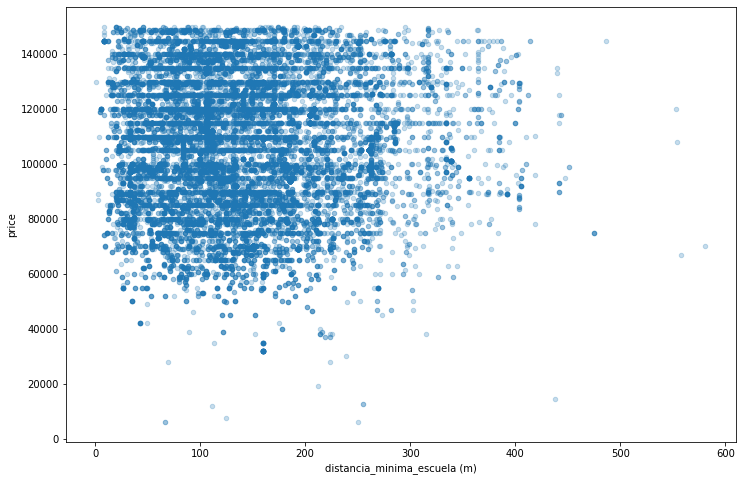

In [7]:
%matplotlib inline
df = propiedades[propiedades['distancia_minima_escuela (m)']< 2000]
df = df[df['price']< 150000]
df.plot.scatter('distancia_minima_escuela (m)', 'price',alpha=0.25, figsize=(12,8))

In [16]:
propiedades.sample(200)

,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte,distancia_minima_escuela (m)
48239,2019-03-01,2019-03-15,-34.601520,-58.424350,Almagro,1.0,0.0,1.0,40.0,37.0,99000.0,Departamento de 1 ambiente en Venta en Almagro,OPORTUNIDAD 40 MTS PRECIO INVERSOR Se deja con...,Departamento,Venta,0.044252,1761.541184,33.514732
35138,2019-08-01,2019-08-14,-34.593371,-58.442232,Palermo,2.0,1.0,1.0,52.0,46.0,145500.0,Departamento de 2 ambientes en Venta en Palermo,2 Amplios y hermosos ambientes ambientes -C...,Departamento,Venta,0.070284,2128.690373,262.747121
24043,2019-06-22,9999-12-31,-34.568297,-58.448495,Belgrano,3.0,0.0,1.0,86.0,80.0,260000.0,Belgrano I 3 ambientes,Ofrecemos en Venta un excepcional Departamento...,Departamento,Venta,0.101619,399.022520,108.103640
16034,2019-02-27,2019-06-23,-34.617175,-58.393062,Balvanera,2.0,1.0,1.0,62.0,62.0,110000.0,CHILE 1900/BALVANERA.VENTA 2 AMBIENTES,HERMOSO DOS AMBIENTES EN BALVANERA-CNTRAFRENTE...,Departamento,Venta,0.025509,0.013503,112.044645
10513,2019-07-31,9999-12-31,-34.607895,-58.444543,Caballito,3.0,2.0,2.0,67.0,57.0,163200.0,venta de departamento 3 ambientes en el corazo...,A metros del Cid Campeador y parque Centenario...,Departamento,Venta,0.067710,0.015876,216.575843
44531,2019-08-23,9999-12-31,-34.630990,-58.420189,Boedo,2.0,0.0,1.0,41.0,38.0,115000.0,Excelentes Unidades de 2 Ambientes en Duplex c...,"Se trata de un departamento de 2 ambientes, de...",Departamento,Venta,0.066451,1348.023437,117.063773
16208,2019-03-15,2019-03-30,-34.590055,-58.449306,Villa Crespo,1.0,0.0,1.0,38.0,34.0,94800.0,Departamento de 1 ambiente en Venta en Villa c...,1 AMB MUY AMPLIO A ESTRENAR CON VISTA A LA P...,Departamento,Venta,0.080673,0.003396,126.892330
9830,2019-07-24,2019-08-12,-34.603323,-58.418310,Almagro,2.0,0.0,1.0,45.0,41.0,176904.0,Departamento - Almagro,"Lumiere Urbano , UF 301<br>",Departamento,Venta,0.036905,0.010583,148.988042
41976,2019-06-29,2019-09-14,-34.625440,-58.413449,Boedo,2.0,1.0,1.0,52.0,42.0,128000.0,2 Amb Venta Boedo A ESTRENAR 2 balcones luminoso,Corredor Responsable: Daniel Acosta - CUCICBA ...,Departamento,Venta,0.054161,190.901398,22.791935
1848,2019-06-22,2019-06-23,-34.627735,-58.430333,Caballito,4.0,3.0,4.0,200.0,123.0,524200.0,DONNA Magna by Azcuy,Departamento en duplex con terraza propia de 4...,Departamento,Venta,0.073340,0.013362,297.701517


In [17]:
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53395 entries, 0 to 53394
Data columns (total 18 columns):
start_date                      53395 non-null object
end_date                        53395 non-null object
lat                             53395 non-null float64
lon                             53395 non-null float64
barrio                          53395 non-null object
rooms                           53395 non-null float64
bedrooms                        53395 non-null float64
bathrooms                       53395 non-null float64
surface_total                   53395 non-null float64
surface_covered                 53395 non-null float64
price                           53395 non-null float64
title                           53395 non-null object
description                     53395 non-null object
property_type                   53395 non-null object
operation_type                  53395 non-null object
dist_centro                     53395 non-null float64
min_dist_subte    

In [18]:
propiedades.to_csv('dataFiltrada/dataV4.csv')
